In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.metrics import accuracy_score, mean_squared_error # For evaluating performance
import matplotlib.pyplot as plt # For plotting the tree

In [8]:
glass = pd.read_csv(r'D:\workspace\MachineLearning\Cases\Glass Identification\Glass.csv')
le = LabelEncoder()

In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [4]:
X,y = glass.drop('Type', axis=1), glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [5]:
dtc = DecisionTreeClassifier(random_state=25)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6615384615384615


In [6]:
depths = [2,3,4,5,6,None]
min_samples = [2,10,20,50,75]
min_sample_leaf = [1,10,20,50,75]
scores=[]

for d in depths:
    for leaf in min_sample_leaf:
        for split in min_samples:
            dtc = DecisionTreeClassifier(random_state=25, max_depth=d, min_samples_leaf=leaf, min_samples_split= split)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            scores.append([d,leaf,split,accuracy_score(y_test, y_pred)])

scores_df = pd.DataFrame(scores, columns=['Depth','Leaf','Split', 'Scores'])
scores_df.sort_values('Scores', ascending=False).iloc[0]

Depth           NaN
Leaf       1.000000
Split     10.000000
Scores     0.723077
Name: 126, dtype: float64

In [11]:
best_tree = DecisionTreeClassifier(random_state=25, max_depth=None, min_samples_leaf=1, min_samples_split= 10)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10, random_state=25)

In [12]:
best_tree.feature_importances_

array([0.09877936, 0.09372758, 0.11933908, 0.18689921, 0.03094841,
       0.00813694, 0.17915606, 0.23557859, 0.04743478])

In [13]:
X.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [14]:
df_imp = pd.DataFrame({
    'Feature':list(X.columns),
    'Importance' : best_tree.feature_importances_
})

df_imp.sort_values('Importance', ascending=False)

,Feature,Importance
7,Ba,0.235579
3,Al,0.186899
6,Ca,0.179156
2,Mg,0.119339
0,RI,0.098779
1,Na,0.093728
8,Fe,0.047435
4,Si,0.030948
5,K,0.008137


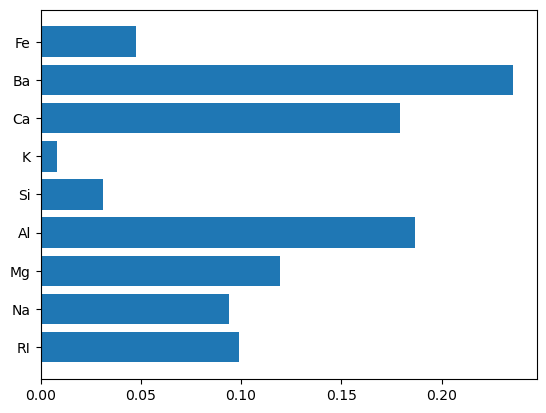

In [16]:
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.show()

In [20]:
plt.figure(figsize=(150, 150))
plot_tree(best_tree, feature_names=list(X.columns),  filled=True, rounded=True, fontsize=14)
plt.show()